In [1]:
#Installation of ultralytics
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
#Download the yolo model .pt
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/bus.jpg'

100% 5.35M/5.35M [00:00<00:00, 88.6MB/s]
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 134k/134k [00:00<00:00, 7.44MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 45.2ms
Speed: 13.3ms preprocess, 45.2ms inference, 419.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [3]:
#Code to load model in python
from ultralytics import YOLO
model = YOLO('yolo11n.pt')

In [4]:
#Code To upload and un zip the dataset extracted from roboflow
from google.colab import files
import zipfile, os

uploaded = files.upload()
zip_path = next(iter(uploaded))
extract_path = "/content/bread_dataset"
!rm -rf {extract_path}
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ New dataset extracted.")

Saving Bread Identifier.v3i.yolov11.zip to Bread Identifier.v3i.yolov11.zip
✅ New dataset extracted.


In [5]:
results = model.train(
    data='/content/bread_dataset/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    name="bread_identifier"
)


Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/bread_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=bread_identifier, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/bread_dataset/train/labels... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<00:00, 1985.14it/s]

train: New cache created: /content/bread_dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 84, len(boxes) = 268. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/bread_dataset/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 1051.86it/s]

val: New cache created: /content/bread_dataset/valid/labels.cache


Plotting labels to runs/detect/bread_identifier/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/bread_identifier
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.35G      1.304      3.287      1.646         16        640: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         10         15    0.00476          1      0.222       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G      1.189      3.069      1.587         16        640: 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         10         15    0.00398      0.767      0.278      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.38G      1.195      2.745      1.505         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         10         15     0.0045      0.833       0.37      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.4G      1.232      2.464      1.592         16        640: 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]

                   all         10         15    0.00587      0.833      0.353      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.41G      1.298      2.299      1.636         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         10         15    0.00385      0.708      0.113     0.0548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.43G      1.324      2.187      1.664          7        640: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         10         15      0.369        0.3      0.104     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.44G      1.288      2.038      1.633         18        640: 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

                   all         10         15      0.357      0.133     0.0722     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.46G      1.341      1.892      1.609         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all         10         15     0.0137     0.0667     0.0446     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.48G      1.334      1.989      1.669         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         10         15      0.406      0.395      0.287      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.49G      1.267      1.925      1.593         29        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         10         15      0.977     0.0833      0.136     0.0534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.51G      1.296      1.924      1.635         11        640: 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all         10         15      0.519      0.283       0.18     0.0956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.52G      1.233       1.76      1.515         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.21it/s]

                   all         10         15      0.473      0.325      0.162     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.54G      1.253      1.776      1.551         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]

                   all         10         15      0.569       0.15      0.109      0.039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.55G      1.266      1.732      1.586         15        640: 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         10         15      0.561      0.253       0.19      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.56G      1.225      1.694      1.508         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.26it/s]

                   all         10         15      0.507      0.317      0.179     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.58G      1.182        1.6      1.499         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.91it/s]

                   all         10         15      0.125      0.358      0.149     0.0402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.6G      1.192      1.714      1.524         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         10         15      0.223        0.6      0.258      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.61G      1.227      1.711      1.556         10        640: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         10         15      0.492      0.233      0.115     0.0284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.62G      1.179      1.647      1.488         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.82it/s]

                   all         10         15      0.579      0.125      0.172     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.64G      1.239      1.613      1.503         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         10         15      0.297      0.533      0.339      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.65G      1.189       1.59      1.488         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         10         15      0.519      0.533      0.536      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.67G      1.159      1.523      1.479         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         10         15      0.432      0.575      0.358      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.68G      1.255      1.613      1.522         23        640: 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.62it/s]

                   all         10         15      0.397      0.342      0.376      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.7G      1.155      1.512      1.487         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.65it/s]

                   all         10         15      0.297      0.683      0.319      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.71G      1.107      1.393      1.413         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


                   all         10         15      0.615      0.575      0.422      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.73G      1.126      1.433       1.47         18        640: 100%|██████████| 10/10 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         10         15      0.274      0.467       0.35      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.74G      1.113      1.462      1.423         15        640: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all         10         15      0.687      0.408      0.308       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.76G      1.137      1.453      1.463         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]

                   all         10         15      0.392      0.533      0.391      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.77G      1.152       1.46       1.45         18        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.40it/s]

                   all         10         15      0.592      0.467      0.408      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.79G      1.145      1.337      1.443         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         10         15      0.592      0.467      0.489       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.8G      1.103      1.335       1.41         18        640: 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         10         15       0.33      0.575      0.426      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.82G      1.073      1.274      1.404         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


                   all         10         15      0.772      0.449      0.545      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.83G      1.149      1.288      1.467         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]

                   all         10         15      0.614        0.4      0.385      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.85G       1.07      1.321      1.437         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all         10         15       0.65      0.342      0.403      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.86G      1.038      1.254      1.374         11        640: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.72it/s]

                   all         10         15      0.941      0.233      0.335      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.88G      1.002      1.232      1.339         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.56it/s]

                   all         10         15      0.331      0.533      0.387      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.89G      1.128      1.345      1.416          9        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all         10         15      0.377      0.533      0.396      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.91G      1.055      1.201      1.387         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.44it/s]

                   all         10         15      0.808      0.332      0.326      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.92G      1.068      1.209      1.364         15        640: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all         10         15      0.608        0.4       0.32      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.94G      1.117      1.249      1.438         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.37it/s]

                   all         10         15      0.783        0.3       0.34      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.95G      1.109      1.182      1.447         10        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.37it/s]

                   all         10         15      0.782      0.375      0.385      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.96G     0.9895      1.122      1.331         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.74it/s]

                   all         10         15      0.986      0.421      0.538      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.98G      1.077        1.2      1.397         11        640: 100%|██████████| 10/10 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         10         15      0.689      0.605      0.575      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         3G       1.02      1.165      1.353         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         10         15      0.638      0.575      0.481      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.01G     0.9808      1.074      1.316         18        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all         10         15      0.814      0.408      0.461      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.03G      1.044      1.067      1.372         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.49it/s]

                   all         10         15      0.872      0.367      0.413      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.04G     0.9527      1.015      1.285         12        640: 100%|██████████| 10/10 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         10         15      0.952      0.376      0.468      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.05G     0.9897      1.074      1.358         21        640: 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.60it/s]

                   all         10         15      0.689      0.467      0.512      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.07G     0.9517      1.126      1.296         22        640: 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         10         15      0.777      0.533      0.563      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.09G     0.9778      1.039      1.353         16        640: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


                   all         10         15      0.589      0.408      0.445      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.1G     0.9094     0.9694      1.263         15        640: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         10         15      0.523      0.575      0.553      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.12G     0.9626      1.082      1.292         25        640: 100%|██████████| 10/10 [00:02<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.22it/s]

                   all         10         15      0.732      0.512      0.674      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.13G     0.9468     0.9705      1.307         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         10         15      0.838      0.488      0.667      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.14G     0.9689      1.006      1.324         17        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         10         15      0.751      0.488      0.593      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.16G     0.9331     0.9783       1.32         19        640: 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         10         15      0.773      0.541      0.575      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.17G      1.025      1.074      1.422         10        640: 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all         10         15      0.733       0.55      0.653      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.19G     0.9159     0.9614      1.272         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         10         15      0.887      0.442      0.629      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.2G     0.9461     0.9806       1.28         20        640: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.68it/s]


                   all         10         15      0.918      0.539       0.66      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.22G     0.9207     0.9945      1.309         18        640: 100%|██████████| 10/10 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         10         15      0.937      0.369      0.527      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.23G     0.9435     0.9634      1.275         25        640: 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         10         15      0.974      0.373      0.494      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.25G     0.9131     0.9485      1.265         18        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all         10         15      0.974      0.311      0.447       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.26G     0.9036     0.9622      1.249         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]


                   all         10         15       0.57       0.42      0.544      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.28G     0.8955     0.9537      1.232         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         10         15      0.969      0.339      0.504      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.29G     0.9203      1.007      1.278         32        640: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.99it/s]

                   all         10         15      0.642      0.426        0.5      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.3G     0.8557     0.8861      1.245         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all         10         15      0.884      0.494      0.611      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.32G     0.9191     0.8859      1.255         26        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.76it/s]

                   all         10         15      0.922      0.495      0.641      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.34G     0.8532     0.8479      1.264         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         10         15      0.895      0.494      0.674      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.35G     0.8556      0.848      1.199         23        640: 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


                   all         10         15      0.907      0.542      0.681      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.37G     0.8619     0.8796      1.231         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]

                   all         10         15      0.763      0.552      0.649      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.38G     0.8607     0.8619      1.218         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all         10         15      0.704      0.591      0.647      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.4G     0.8296     0.8615       1.22         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.36it/s]


                   all         10         15      0.713      0.593      0.652      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.41G     0.8874     0.8677      1.266         17        640: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.63it/s]

                   all         10         15      0.763      0.583      0.686      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.42G     0.8407     0.7873      1.235         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all         10         15      0.944      0.565      0.692      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.44G     0.8511     0.8347      1.211         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.95it/s]

                   all         10         15      0.938       0.56      0.696       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.45G      0.803     0.8057      1.193         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         10         15      0.943      0.552      0.696      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.47G     0.8349     0.8101      1.216         14        640: 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.67it/s]

                   all         10         15       0.95      0.556      0.696      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.49G     0.7663     0.7667      1.175         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]

                   all         10         15      0.943      0.564      0.698      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       3.5G     0.8317     0.8391      1.204         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.56it/s]


                   all         10         15      0.943      0.564      0.693      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.51G     0.8448     0.8234      1.213         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]


                   all         10         15      0.894      0.585      0.692      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.53G      0.809     0.7686      1.201         15        640: 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         10         15      0.866      0.514      0.639      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.54G     0.8639      0.842      1.262         12        640: 100%|██████████| 10/10 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all         10         15      0.728      0.524      0.552      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.56G     0.7623      0.758      1.182         12        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         10         15      0.525       0.57      0.522      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.57G     0.7323       0.74       1.16         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         10         15      0.572      0.377      0.467      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.59G     0.8053     0.7633      1.172         15        640: 100%|██████████| 10/10 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         10         15      0.651       0.55      0.622      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.61G     0.7414     0.7368      1.169         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         10         15       0.65      0.496      0.623      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.62G      0.735     0.7333      1.148         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]

                   all         10         15      0.674      0.491      0.551      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.63G     0.7262     0.7393      1.127         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.15it/s]

                   all         10         15      0.703      0.485       0.54      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.65G     0.7298     0.7216      1.134         22        640: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         10         15      0.817      0.545      0.575      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.66G     0.7272     0.7029      1.161         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all         10         15      0.812      0.553      0.676      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.68G     0.7164     0.7105      1.132         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         10         15      0.942      0.574      0.675      0.362


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.69G     0.6229     0.7542      1.105         10        640: 100%|██████████| 10/10 [00:03<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.36it/s]

                   all         10         15      0.765      0.588      0.658      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.71G     0.7041      0.824      1.201          7        640: 100%|██████████| 10/10 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]


                   all         10         15      0.851      0.508      0.638      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.72G     0.6277     0.7122      1.137          6        640: 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all         10         15      0.867      0.519      0.654      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.73G     0.6138     0.6743      1.105         16        640: 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.42it/s]

                   all         10         15      0.908      0.513      0.658       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.75G     0.6265     0.6915      1.111         12        640: 100%|██████████| 10/10 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         10         15      0.921      0.487      0.665      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.77G     0.6068     0.6578      1.122          7        640: 100%|██████████| 10/10 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         10         15      0.938      0.481      0.674      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.78G      0.599     0.7052      1.105         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all         10         15      0.759      0.648      0.691      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       3.8G     0.5841     0.6265       1.08         10        640: 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         10         15      0.772      0.653      0.691      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.81G     0.6097     0.6368      1.124          8        640: 100%|██████████| 10/10 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.90it/s]


                   all         10         15      0.794      0.641      0.691      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.82G     0.5596     0.6122      1.065         14        640: 100%|██████████| 10/10 [00:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]


                   all         10         15      0.786      0.621      0.691      0.362

100 epochs completed in 0.090 hours.
Optimizer stripped from runs/detect/bread_identifier/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/bread_identifier/weights/best.pt, 5.5MB

Validating runs/detect/bread_identifier/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.03it/s]


                   all         10         15      0.921      0.487      0.665      0.438
              baguette          2          2      0.928        0.5      0.495      0.396
          maltese_loaf          2          5      0.836        0.4      0.517      0.376
        packaged_bread          6          8          1      0.562      0.982      0.543
Speed: 0.5ms preprocess, 3.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/bread_identifier


In [6]:
#4. Implement a function to recognise a human hand in a video frame or sequence of frames.

#setup
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [ ]:
#Basic hand detector (no bread)
import cv2
import mediapipe as mp

# Initialize MediaPipe
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.5
)

# Load your video file here
video_path = 'hand_bread_test.mov'
cap = cv2.VideoCapture(video_path)

# Set up output writer
out = cv2.VideoWriter('hand_output.avi',
                      cv2.VideoWriter_fourcc(*'XVID'),
                      int(cap.get(cv2.CAP_PROP_FPS)),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Flip for consistency and convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)
    frame_bgr = frame.copy()

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_draw.draw_landmarks(
                frame_bgr,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_draw.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=4),
                mp_draw.DrawingSpec(color=(0,0,255), thickness=2)
            )

            # Draw bounding box
            h, w, _ = frame_bgr.shape
            x_list = [lm.x * w for lm in hand_landmarks.landmark]
            y_list = [lm.y * h for lm in hand_landmarks.landmark]
            bbox = (int(min(x_list)), int(min(y_list)), int(max(x_list)), int(max(y_list)))
            cv2.rectangle(frame_bgr, (bbox[0]-10, bbox[1]-10), (bbox[2]+10, bbox[3]+10), (255,0,0), 2)

    out.write(frame_bgr)

cap.release()
out.release()
print("✅ Processing complete. Video saved as 'hand_output.avi'")


✅ Processing complete. Video saved as 'hand_output.avi'


In [9]:
#Hand detector when touched bread with bread detector.
from ultralytics import YOLO
import cv2
import mediapipe as mp

# Load trained YOLOv11 model
model = YOLO('/content/runs/detect/bread_identifier/weights/best.pt')

# Load video
#Make sure to download the .mov from the submission file before running
video_path = 'Maltese loaf hand grab.mov'
cap = cv2.VideoCapture(video_path)

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)

# Output writer
out = cv2.VideoWriter('alert_output.avi',
                      cv2.VideoWriter_fourcc(*'XVID'),
                      int(cap.get(cv2.CAP_PROP_FPS)),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Detect bread with YOLO
    bread_results = model.predict(source=frame, conf=0.5, verbose=False)[0]

    # Detect hands with MediaPipe
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    hand_results = hands.process(rgb)
    h, w, _ = frame.shape
    hand_boxes = []

    if hand_results.multi_hand_landmarks:
        for hand_landmarks in hand_results.multi_hand_landmarks:
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Get bounding box for the hand
            x_vals = [lm.x * w for lm in hand_landmarks.landmark]
            y_vals = [lm.y * h for lm in hand_landmarks.landmark]
            x_min, x_max = int(min(x_vals)), int(max(x_vals))
            y_min, y_max = int(min(y_vals)), int(max(y_vals))
            hand_box = (x_min, y_min, x_max, y_max)
            hand_boxes.append(hand_box)
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Check for intersections
    for box in bread_results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]

        # Draw the bread bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 200, 0), 2)
        cv2.putText(frame, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 200, 0), 2)

        if class_name == "maltese_loaf":
            for hx1, hy1, hx2, hy2 in hand_boxes:
                # Check for intersection
                if x1 < hx2 and x2 > hx1 and y1 < hy2 and y2 > hy1:
                    # Overlapping – hand touching bread
                    cv2.putText(frame, "ALERT: Hand touched bread!", (50, 50),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
                    break

    out.write(frame)

cap.release()
out.release()
print("✅ Finished! Alert video saved as 'alert_output.avi'")


✅ Finished! Alert video saved as 'alert_output.avi'


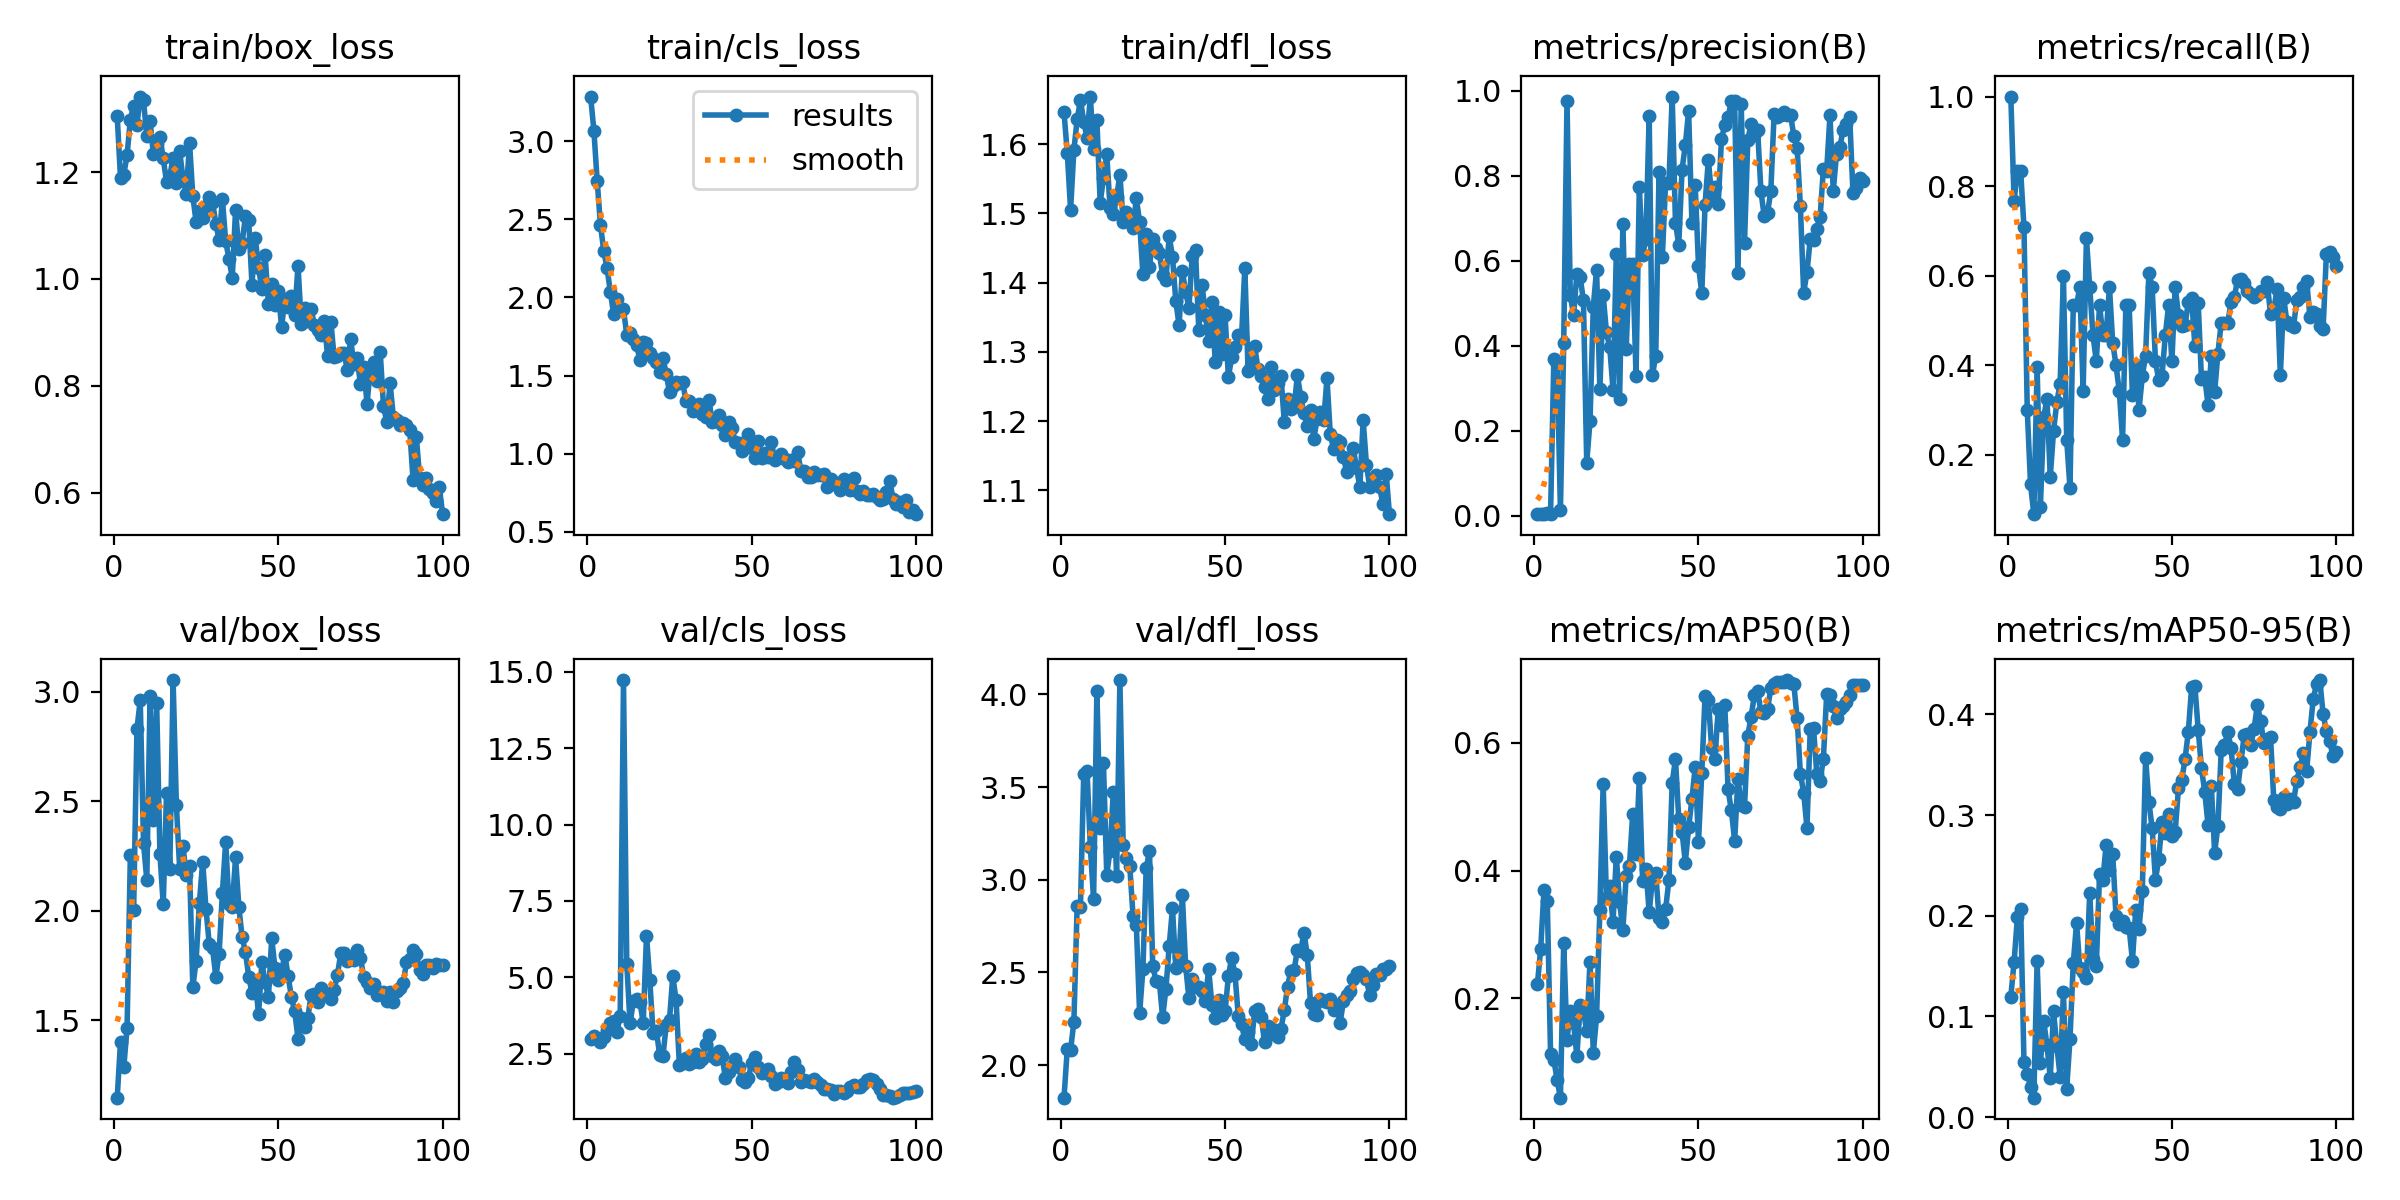

In [10]:
from IPython.display import Image
Image(filename='runs/detect/bread_identifier/results.png')

In [11]:
#Confusion matrix generation
val_results = model.val()

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/bread_dataset/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


                   all         10         15       0.92      0.487      0.665      0.438
              baguette          2          2      0.928        0.5      0.495      0.396
          maltese_loaf          2          5      0.834        0.4      0.517      0.376
        packaged_bread          6          8          1      0.561      0.982      0.543
Speed: 0.2ms preprocess, 13.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


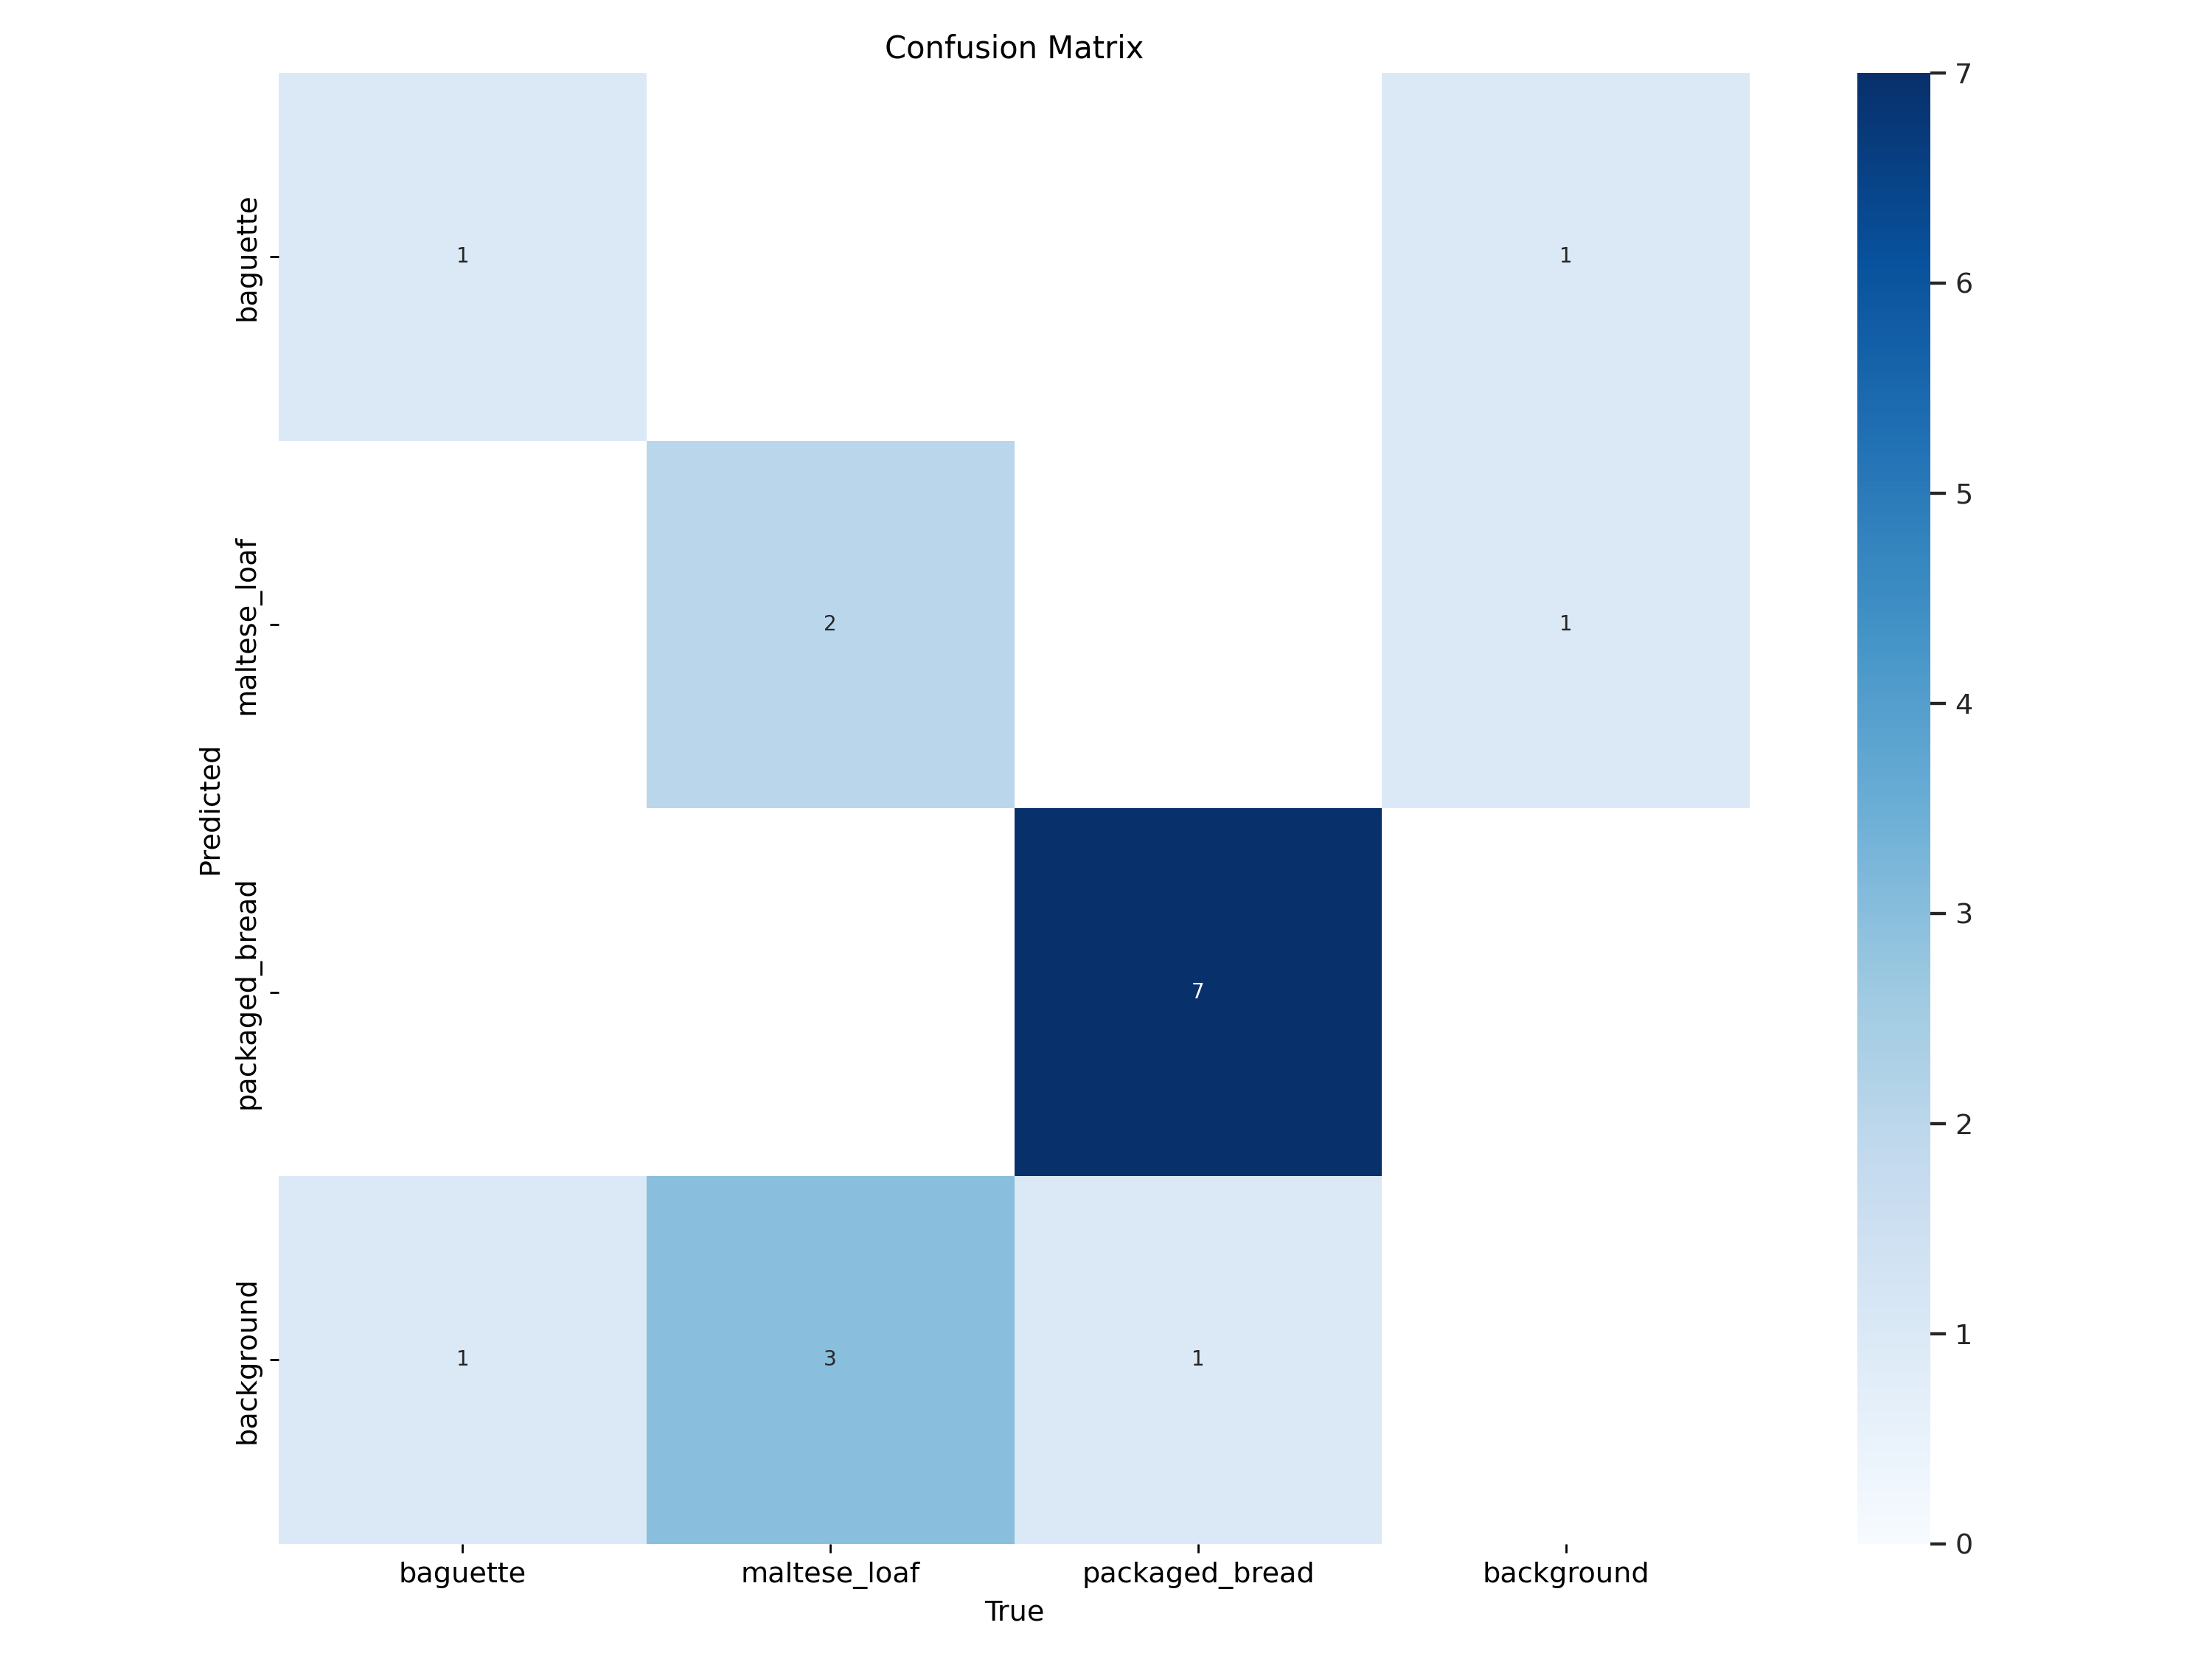

In [12]:
#Cofusion matrix display
from IPython.display import Image
Image(filename='/content/runs/detect/val/confusion_matrix.png')

In [13]:
#Generate Predictions (Packaged bread, maltase loaf and baguette detections)

model.predict(source='/content/bread_dataset/test/images', save=True, conf=0.5)

Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'baguette', 1: 'maltese_loaf', 2: 'packaged_bread'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 2